In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import bike_prep
from model_functions import *
from plotting_functions import *
import no_gpu
import reproducible
from sklearn.metrics import mean_squared_error

In [4]:
import time

In [5]:
X_train, X_test, y_train, y_test = bike_prep()

In [6]:
layers = 5
neurons = [64, 32, 32, 16, 1]
n_cols = X_train.shape[1]
batch_size = 32
epochs = 10

Epoch 1/10
462/462 [==============================] - 0s 871us/step - loss: 28980.8086 - mse: 28980.8086 - val_loss: 12168.9033 - val_mse: 12168.9033
Epoch 2/10
462/462 [==============================] - 0s 639us/step - loss: 8992.1719 - mse: 8992.1719 - val_loss: 8138.0312 - val_mse: 8138.0312
Epoch 3/10
462/462 [==============================] - 0s 635us/step - loss: 7141.7822 - mse: 7141.7822 - val_loss: 6515.9761 - val_mse: 6515.9761
Epoch 4/10
462/462 [==============================] - 0s 633us/step - loss: 5053.6572 - mse: 5053.6572 - val_loss: 3913.1035 - val_mse: 3913.1035
Epoch 5/10
462/462 [==============================] - 0s 650us/step - loss: 3355.6262 - mse: 3355.6262 - val_loss: 2878.9087 - val_mse: 2878.9087
Epoch 6/10
462/462 [==============================] - 0s 639us/step - loss: 2806.2971 - mse: 2806.2971 - val_loss: 2552.0852 - val_mse: 2552.0852
Epoch 7/10
462/462 [==============================] - 0s 633us/step - loss: 2535.0876 - mse: 2535.0876 - val_loss: 2401.

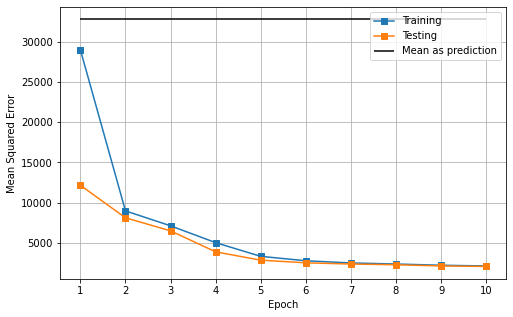

In [7]:
model = nn_model_structure(layers = layers,
                           neurons = neurons,
                           n_cols = n_cols,
                           classification = False)
model = nn_model_compile(model,
                         optimizer = "adam")
start_time = time.time()
model = nn_model_fit(model,
                     X_train,
                     y_train,
                     X_val = X_test,
                     y_val = y_test,
                     batch_size = batch_size,
                     epochs = epochs)
end_time = time.time()
print("Overall calculation took {} seconds.".format(end_time - start_time))
model.summary()
nn_plot_mse(model,
            mse_mean = mean_squared_error(y_train, np.ones(shape = (len(y_train),))*np.mean(y_train)))

In [8]:
model.history.history

{'loss': [28980.80859375,
  8992.171875,
  7141.7822265625,
  5053.6572265625,
  3355.626220703125,
  2806.297119140625,
  2535.087646484375,
  2403.518310546875,
  2251.83203125,
  2160.8583984375],
 'mse': [28980.80859375,
  8992.171875,
  7141.7822265625,
  5053.6572265625,
  3355.626220703125,
  2806.297119140625,
  2535.087646484375,
  2403.518310546875,
  2251.83203125,
  2160.8583984375],
 'val_loss': [12168.9033203125,
  8138.03125,
  6515.97607421875,
  3913.103515625,
  2878.90869140625,
  2552.085205078125,
  2401.681396484375,
  2312.374755859375,
  2163.51123046875,
  2102.10791015625],
 'val_mse': [12168.9033203125,
  8138.03125,
  6515.97607421875,
  3913.103515625,
  2878.90869140625,
  2552.085205078125,
  2401.681396484375,
  2312.374755859375,
  2163.51123046875,
  2102.10791015625]}

In [9]:
model.evaluate(X_test, y_test)

82/82 [==============================] - 0s 427us/step - loss: 2102.1079 - mse: 2102.1079


[2102.10791015625, 2102.10791015625]

In [10]:
y_true, y_pred = nn_mse_pred_true(model, X_test, y_test, print_comp = True)

Prediction: 250.35971069335938, Actual: 254
Prediction: 121.3013916015625, Actual: 114
Prediction: 98.70003509521484, Actual: 70
Prediction: 156.99267578125, Actual: 148
Prediction: 175.2736358642578, Actual: 163
Prediction: 464.9516906738281, Actual: 578
Prediction: 465.0634765625, Actual: 573
Prediction: 19.576623916625977, Actual: 32
Prediction: 309.88421630859375, Actual: 297
Prediction: 114.36531829833984, Actual: 123
Prediction: 131.54788208007812, Actual: 92
Prediction: 449.0473327636719, Actual: 522
Prediction: 291.2594299316406, Actual: 386
Prediction: 366.10687255859375, Actual: 370
Prediction: 173.80050659179688, Actual: 126
Prediction: 306.3073425292969, Actual: 296
Prediction: 120.90937042236328, Actual: 89
Prediction: 17.36321449279785, Actual: 23
Prediction: 211.0257568359375, Actual: 331
Prediction: 118.91033172607422, Actual: 170
Prediction: 219.00555419921875, Actual: 291
Prediction: 171.64166259765625, Actual: 187
Prediction: 11.436976432800293, Actual: 14
Prediction

Prediction: 555.1561889648438, Actual: 671
Prediction: 35.702903747558594, Actual: 47
Prediction: 14.553410530090332, Actual: 11
Prediction: 144.04644775390625, Actual: 162
Prediction: 118.7513198852539, Actual: 127
Prediction: 281.4457092285156, Actual: 231
Prediction: 126.14986419677734, Actual: 173
Prediction: 600.5429077148438, Actual: 592
Prediction: 387.57470703125, Actual: 382
Prediction: 342.3434753417969, Actual: 300
Prediction: 48.0766716003418, Actual: 50
Prediction: 138.91629028320312, Actual: 256
Prediction: 241.55221557617188, Actual: 204
Prediction: 180.11892700195312, Actual: 203
Prediction: 161.58250427246094, Actual: 151
Prediction: 131.37405395507812, Actual: 131
Prediction: 2.6010632514953613, Actual: 1
Prediction: 3.701225757598877, Actual: 2
Prediction: 80.44083404541016, Actual: 84
Prediction: 29.750041961669922, Actual: 28
Prediction: 58.442726135253906, Actual: 35
Prediction: 119.15921783447266, Actual: 134
Prediction: 152.87925720214844, Actual: 156
Prediction

Prediction: 76.0849380493164, Actual: 18
Prediction: 282.4606628417969, Actual: 289
Prediction: 267.0889892578125, Actual: 164
Prediction: 58.032039642333984, Actual: 41
Prediction: 326.8230285644531, Actual: 268
Prediction: 65.33135223388672, Actual: 63
Prediction: 409.7019348144531, Actual: 498
Prediction: 210.04486083984375, Actual: 215
Prediction: 51.99464797973633, Actual: 30
Prediction: 497.2696838378906, Actual: 528
Prediction: 11.216531753540039, Actual: 9
Prediction: 320.4954528808594, Actual: 405
Prediction: 14.408907890319824, Actual: 24
Prediction: 117.2458267211914, Actual: 129
Prediction: 207.89320373535156, Actual: 166
Prediction: 489.5660095214844, Actual: 546
Prediction: 298.315185546875, Actual: 286
Prediction: 167.05235290527344, Actual: 186
Prediction: 6.234560012817383, Actual: 7
Prediction: 317.7535095214844, Actual: 349
Prediction: 737.490234375, Actual: 729
Prediction: 58.4342155456543, Actual: 58
Prediction: 44.37173843383789, Actual: 79
Prediction: 0.414522767